# Read PMID data

In [2]:
import numpy as np
import pandas as pd

df=pd.read_csv("data/pmids_gold_set_labeled.txt", sep='\s+', header=None)
df1=df.replace(np.nan, '', regex=True)

pmids_gold_labeled=pd.DataFrame()
pmids_gold_labeled[0]=df1[0]

pmids_gold_labeled[1]=df1[1] + " " + df1[2] + " " + df1[3] + " " + df1[4]
#print(pmids_gold_labeled)

labels=[l.strip().lower() for l in pmids_gold_labeled[1] if l.strip()]
#print(labels)

label_set=set(labels)
print(label_set)
pmids_gold_unlabeled=pd.read_csv("data/pmids_gold_set_unlabeled.txt", sep='\s+', header=None)
#print(pmids_gold_unlabeled)

pmids_test_unlabeled=pd.read_csv("data/pmids_test_set_unlabeled.txt", sep='\s+', header=None)
#print(pmids_test_unlabeled)



{'triple negative breast cancer', 'osteogenesis imperfecta', 'bardet-biedl syndrome', 'spinal muscular atrophy', 'cystic fibrosis', 'neurofibromatosis'}


# Getting training data from results

In [3]:
import json
import pandas as pd
from pandas.io.json import json_normalize

train_data=pd.DataFrame(columns=['sourceid','text','denotations'])
with open('data/train.json','r') as ipfile:
    publications=json.load(ipfile)
#print(publications)
for i, pub in enumerate(publications.values()):
    train_denotations=[d['obj'] for d in pub['denotations']]
    train_data.loc[i]=[pub['sourceid'],pub['text'], train_denotations]
#print(train_data['text'][1])

train_text=' '.join(train_data['text'])
#print(train_text)
#print(train_data['denotations'])
def denotation_label(denotations):
    diseases=list()
    for rec in denotations:
        #print(rec)
        count_obj=dict()
        if rec:
            for item in rec:
                
                if item in count_obj: count_obj[item]+=1
                else: count_obj[item]=1
            diseases.append(max(count_obj, key=lambda key:count_obj[key]))
        else:
            diseases.append("")
    return diseases
denotation=denotation_label(train_data['denotations'])
denotation
print(train_data['denotations'])

0      [Disease:D001943, Disease:D001943, Disease:D00...
1      [Disease:D010013, Disease:D010013, Disease:D01...
2      [Disease:D009362, Disease:D009362, Disease:D00...
3      [Disease:D001943, Disease:D001943, Disease:D00...
4      [Disease:D017253, Disease:D017253, Disease:C53...
5      [Disease:D001943, Disease:D001943, Disease:D00...
6      [Disease:D020788, Disease:D049932, Disease:D03...
7      [Disease:D010013, Disease:D010013, Disease:D01...
8      [Disease:D003550, Disease:D003550, Disease:D00...
9      [Disease:D001943, Disease:D001943, Disease:D00...
10     [Disease:D003550, Disease:D003550, Disease:D00...
11     [Disease:D003550, Disease:D003550, Disease:D00...
12     [Disease:D017253, Disease:D017253, Disease:C53...
13     [Disease:D003550, Disease:D003550, Disease:D00...
14     [Disease:D020788, Disease:D020788, Disease:D00...
15     [Disease:D009369, Disease:D001943, Disease:D00...
16     [Disease:D010013, Disease:D001847, Disease:C53...
17     [Disease:D016472, Diseas

# Training text wordcloud

In [4]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Add more words to ignore 
stopwords.update(["patient","Patient","treatment", "risk", "case", "may"])

# Create stopword list:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Generate wordcloud data
wordcloud = WordCloud(stopwords=stopwords, max_words=25, \
                      background_color="white").generate(train_text)

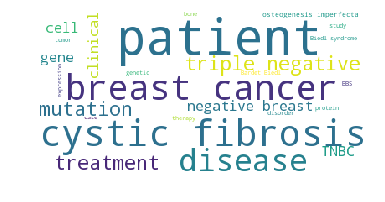

In [5]:
import matplotlib.pyplot as mpLib
mpLib.imshow(wordcloud)
mpLib.axis("off")
mpLib.show()

# Preprocess train

In [6]:
#nlp processing on text

from numpy import array
import re
import pandas as pd

from nltk import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk import bigrams
from nltk.corpus import stopwords
from nltk import pos_tag

def preprocess_text(text):

    #Get rid of punctuations
    tokenizer=RegexpTokenizer(r'\w+')
    tokens=tokenizer.tokenize(text)

    stop_words=[s.lower() for s in stopwords.words('english')]
    
    #get list to rid irrelevant most frequent words
    other_words= ["patient","patient's","treatment","case","clinical","result"]

    tokens=[word.lower().strip() for word in tokens]

    #get rid of stopwords
    tokens=[word.strip().lower() for word in tokens if word.strip() and word.strip().lower() not in stop_words ]
    tokens = [word for word in tokens if word not in other_words]


    #lemmetize the text
    wnl=WordNetLemmatizer()
    tokens=[wnl.lemmatize(word) for word in tokens]

    #tokens=bigrams(tokens)

    #form the string back
    return(tokens)
    
    
# queries: column of queries
train_text_p=""
result= list()
t_list=list()
processed=" "
for text in train_data['text']:
    tokens=preprocess_text(text)
    article=' '.join(tokens)
    #__import__('PorterStemmer',fromlist='nltk')
    train_text= train_text + " " + article
    result.append(article)
    t_list.append(list(tokens))
#tokens=[word for word in tokenizer.tokenize(result)]
print(t_list)
NNS=list()
for token_list in t_list:
    NNS.append(' '.join([w[0] for w in pos_tag(token_list) if w[1]=='NN']))
print(NNS)

[['triple', 'negative', 'breast', 'carcinoma', 'current', 'emerging', 'concept', 'objective', 'triple', 'negative', 'breast', 'cancer', 'regarded', 'aggressive', 'disease', 'affect', 'young', 'population', 'effective', 'targeted', 'therapy', 'yet', 'available', 'method', 'intense', 'effort', 'made', 'gain', 'better', 'understanding', 'heterogeneous', 'group', 'tumor', 'histologic', 'genomic', 'molecular', 'level', 'result', 'progress', 'made', 'including', 'ability', 'subtype', 'tumor', 'discovery', 'biomarkers', 'toward', 'current', 'therapeutic', 'effort', 'focused', 'many', 'novel', 'target', 'exploration', 'potential', 'affect', 'course', 'disease', 'conclusion', 'article', 'review', 'current', 'concept', 'regarding', 'clinicopathologic', 'feature', 'triple', 'negative', 'breast', 'carcinoma', 'histologic', 'subtypes', 'molecular', 'classification', 'prognostic', 'therapeutic', 'potential', 'biomarkers', 'emerging', 'targeted', 'therapy'], ['osteogenesis', 'imperfecta', 'diagnosis'

['breast carcinoma concept triple breast cancer disease population therapy method effort gain group tumor level result progress ability tumor discovery effort target exploration course disease conclusion article review concept feature breast carcinoma classification potential therapy', 'osteogenesis imperfecta diagnosis purpose review diagnosis osteogenesis imperfecta discus gene review management disease child adult mutation gene collagen type col1a1 col1a2 cause osteogenesis imperfecta year defect gene osteogenesis imperfecta phenotype transmission bisphosphonate infusion effect compression fracture preventing fracture moment therapy investigation diagnosis osteogenesis imperfecta research bisphosphonate decrease fracture rate fracture agent safety drug practice', 'epirubicin micelle lymph node metastasis breast cancer accumulation ph drug release suppression lymph metastasis alnm goal breast cancer therapy treatment breast cancer tnbc metastasis effect drug epirubicin epi micelle dr

In [7]:
#group your Xs and Ys

X=NNS
Y=denotation


In [8]:
#Do TF-IDF conversion of hashtags
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
hash_matrix=vectorizer.fit_transform(X)
print("\n Feature names Identified :\n")
print(vectorizer.get_feature_names())


 Feature names Identified :

['a2', 'aacr', 'aberration', 'ability', 'abiraterone', 'abnormality', 'abortion', 'abpa', 'abscessus', 'absence', 'absorption', 'abstract', 'abundance', 'abuse', 'access', 'accessory', 'account', 'accounting', 'accumulation', 'accuracy', 'accurate', 'achievement', 'aciii', 'acquisition', 'acta', 'actin', 'action', 'activate', 'activation', 'activity', 'acute', 'adaptation', 'addition', 'address', 'adhesion', 'administration', 'admission', 'adolescence', 'adult', 'advance', 'advantage', 'affect', 'afford', 'age', 'agent', 'aggregate', 'agonist', 'aim', 'airway', 'ajcc', 'al', 'albumin', 'align', 'allele', 'allergen', 'alnm', 'alonso', 'alpha', 'alteration', 'alzheimer', 'amasc', 'amino', 'amniocentesis', 'amplification', 'amygdala', 'anaemia', 'analog', 'analysis', 'andersen', 'androgen', 'angiogenesis', 'animal', 'anomaly', 'antagonist', 'anti', 'antibody', 'antigen', 'antitumor', 'apoptosis', 'appendage', 'application', 'approach', 'appropriateness', 'app

# Find optimal cluster size using elbow method

Sum of squared distances :  [96.05744760267288, 91.23857024515439, 87.20791472350318, 84.26384435309691, 81.49121458911407, 79.50898340290094, 78.1153861494197, 77.70133499044263, 75.81400568384605, 74.63451173367515, 73.86894039988877, 73.0191022833402, 71.42633298844034, 70.20259993274345]


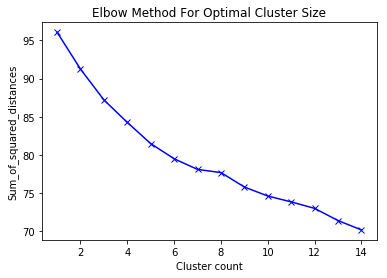

In [11]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(hash_matrix)
    sosd.append(km.inertia_)
    
print("Sum of squared distances : " ,sosd)

#Plot sosd against number of clusters
import matplotlib.pyplot as mpLib
mpLib.plot(K, sosd, 'bx-')
mpLib.xlabel('Cluster count')
mpLib.ylabel('Sum_of_squared_distances')
mpLib.title('Elbow Method For Optimal Cluster Size')
mpLib.show()

# Cluster using K-Means++

In [10]:

#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans

#Split data into 3 clusters
kmeans = KMeans(n_clusters=6).fit(hash_matrix)

#get Cluster labels.
clusters=kmeans.labels_

#Print cluster label and Courses under each cluster
for group in set(clusters):
    print("\nGroup : ",group, "\n-------------------")
    
    for i in range(len(NNS)):
        if ( clusters[i] == group):
            print(train_data['sourceid'][i])
            print(train_data['denotations'][i])


Group :  0 
-------------------
17574030
['Disease:D020788', 'Disease:D049932', 'Disease:D030342', 'Disease:D009765', 'Disease:D012162', 'Disease:D007674', 'Chemical:C092236', 'Chemical:D006160', 'Chemical:C092236', 'Chemical:D006160', 'Chemical:D006160', 'Chemical:C092236', 'Gene:571897', 'Gene:571897', 'Gene:571897', 'Gene:571897', 'Species:7955']
24769255
['Disease:D016472', 'Disease:D009410', 'Disease:D019636', 'Disease:D016472', 'Species:9606']
29039417
['Disease:D030342', 'Disease:D020788', 'Chemical:D000596', 'Chemical:D000596', 'Chemical:D009711', 'Chemical:D000596', 'Species:9606', 'Species:9606']
15231740
['Disease:D020788', 'Disease:D020788', 'Disease:D020788', 'Disease:D020788', 'Disease:D002658', 'Disease:D028361', 'Disease:D020788', 'Disease:D020788', 'Disease:D020788', 'Disease:217000', 'Disease:D020788', 'Disease:D020788', 'Disease:D009765', 'Disease:D003920', 'Disease:D009202', 'Disease:D007859', 'Disease:D008107', 'Gene:188904', 'Gene:180585', 'Gene:179666', 'Species